In [1]:
import pandas as pd
import sqlite3
import matplotlib as plt
%matplotlib inline

In [2]:
def run_query(q):
    conn = sqlite3.connect("chinook.db")
    return pd.read_sql(q, conn)

In [3]:
def run_command(c):
    conn = sqlite3.connect("chinook.db")
    conn.execute(c)

In [4]:
def show_tables():
    q = "select name, type from sqlite_master where type in ('table','view');"
    return run_query(q)    

In [5]:
show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


In [6]:
run_query("select * from customer limit 5")

,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [7]:
#customer_purchase = run_query(
    #"create view customer_purchase as select c.customer_id,c.country,i.invoice_id,i.total from customer c left join invoice i on i.customer_id = c.customer_id"
#)
#normal to be error cause I already created for the first time
#the table already exist
#to avoid error >>  "#" it

In [8]:
#run_query("create view usa as select * from customer_purchase where country = 'USA'")
#normal to be error cause I already created for the first time
#the table already exist
#to avoid error >>  "#" it

In [9]:
run_query("select * from usa")

,customer_id,country,invoice_id,total
0,16,USA,66,6.93
1,16,USA,75,3.96
2,16,USA,257,10.89
3,16,USA,268,10.89
4,16,USA,289,6.93
5,16,USA,389,16.83
6,16,USA,551,10.89
7,16,USA,591,6.93
8,17,USA,98,9.90
9,17,USA,128,6.93


In [11]:
#run_query(
#"create view invoice_genre as select il.invoice_id,il.track_id,t.genre_id,g.name genre from invoice_line il left join track t on t.track_id = il.track_id left join genre g on g.genre_id = t.genre_id")

In [12]:
run_query("select * from invoice_genre")

,invoice_id,track_id,genre_id,genre
0,1,1158,1,Rock
1,1,1159,1,Rock
2,1,1160,1,Rock
3,1,1161,1,Rock
4,1,1162,1,Rock
5,1,1163,1,Rock
6,1,1164,1,Rock
7,1,1165,1,Rock
8,1,1166,1,Rock
9,1,1167,1,Rock


In [13]:
#info of all tracks bought in USA
run_query(
"select usa.*,ig.* from usa left join invoice_genre ig on ig.invoice_id = usa.invoice_id")

,customer_id,country,invoice_id,total,invoice_id,track_id,genre_id,genre
0,16,USA,66,6.93,66,442,1,Rock
1,16,USA,66,6.93,66,1435,1,Rock
2,16,USA,66,6.93,66,1761,7,Latin
3,16,USA,66,6.93,66,1785,14,R&B/Soul
4,16,USA,66,6.93,66,1951,3,Metal
5,16,USA,66,6.93,66,2334,4,Alternative & Punk
6,16,USA,66,6.93,66,3377,23,Alternative
7,16,USA,75,3.96,75,22,1,Rock
8,16,USA,75,3.96,75,1233,3,Metal
9,16,USA,75,3.96,75,1488,1,Rock


In [14]:
#getting the data we wanted
#run_query(
#" create view usa_tracks_sold as select usa.*,ig.*,count(ig.track_id) tracks_sold from usa left join invoice_genre ig on ig.invoice_id = usa.invoice_id group by ig.genre order by tracks_sold desc")

In [15]:
run_query("select * from usa_tracks_sold")

,customer_id,country,invoice_id,total,invoice_id:1,track_id,genre_id,genre,tracks_sold
0,28,USA,577,8.91,577,1602,1,Rock,561
1,28,USA,455,4.95,455,2327,4,Alternative & Punk,130
2,28,USA,577,8.91,577,1944,3,Metal,124
3,28,USA,577,8.91,577,3465,14,R&B/Soul,53
4,28,USA,303,9.90,303,896,6,Blues,36
5,28,USA,577,8.91,577,3336,23,Alternative,35
6,27,USA,562,8.91,562,3117,7,Latin,22
7,28,USA,145,4.95,145,3255,9,Pop,22
8,28,USA,577,8.91,577,3310,17,Hip Hop/Rap,20
9,28,USA,577,8.91,577,604,2,Jazz,14


In [16]:
#all genres in the data
run_query("select distinct genre from invoice_genre")

,genre
0,Rock
1,Pop
2,Alternative & Punk
3,Latin
4,Blues
5,Classical
6,Metal
7,Alternative
8,R&B/Soul
9,Easy Listening


In [17]:
#all genres that are sold in usa
run_query(
"select distinct ig.genre from usa left join invoice_genre ig on ig.invoice_id = usa.invoice_id group by ig.genre")

,genre
0,Alternative
1,Alternative & Punk
2,Blues
3,Classical
4,Easy Listening
5,Electronica/Dance
6,Heavy Metal
7,Hip Hop/Rap
8,Jazz
9,Latin


In [18]:
#calculate the percentage with known value of total tracks sold in USA
run_query("select genre, tracks_sold,round((cast(tracks_sold as float)/1051)*100,2) percent from usa_tracks_sold")

,genre,tracks_sold,percent
0,Rock,561,53.38
1,Alternative & Punk,130,12.37
2,Metal,124,11.80
3,R&B/Soul,53,5.04
4,Blues,36,3.43
5,Alternative,35,3.33
6,Latin,22,2.09
7,Pop,22,2.09
8,Hip Hop/Rap,20,1.90
9,Jazz,14,1.33


In [19]:
run_query("select genre,ROUND((CAST(count(track_id) AS FLOAT)/CAST((select count(track_id)) AS FLOAT))*100,2) percent_track from usa_tracks_sold")

,genre,percent_track
0,TV Shows,100.0


In [20]:
run_query("select sum(tracks_sold)from usa_tracks_sold")

,sum(tracks_sold)
0,1051


In [21]:
run_query("select (cast(tracks_sold as float)/cast(sum(tracks_sold) as float))from usa_tracks_sold")

,(cast(tracks_sold as float)/cast(sum(tracks_sold) as float))
0,0.000951


In [23]:
run_query("select cast(sum(tracks_sold) as float) from usa_tracks_sold")

,cast(sum(tracks_sold) as float)
0,1051.0


In [24]:
#try group by genre >> fail
run_query("select genre, (cast(tracks_sold as float)/cast(sum(tracks_sold) as float)) percent from usa_tracks_sold group by genre")

,genre,percent
0,Alternative,1.0
1,Alternative & Punk,1.0
2,Blues,1.0
3,Classical,1.0
4,Easy Listening,1.0
5,Electronica/Dance,1.0
6,Heavy Metal,1.0
7,Hip Hop/Rap,1.0
8,Jazz,1.0
9,Latin,1.0


In [30]:
genre_sales_usa = run_query("select genre, tracks_sold,round((cast(tracks_sold as float)/1051)*100,2) percent from usa_tracks_sold")

In [27]:
type(genre_sales_usa)

pandas.core.frame.DataFrame

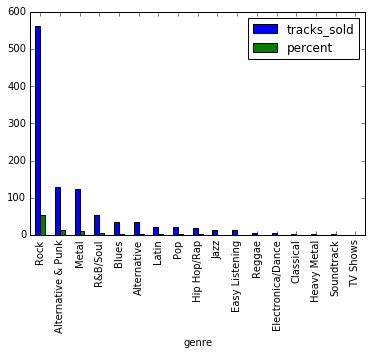

In [28]:
genre_sales_usa.plot.bar(x = "genre")

In [29]:
run_query("SELECT genre,CAST(tracks_sold as float)/(SELECT SUM(tracks_sold) from usa_tracks_sold) as percent FROM usa_tracks_sold")

,genre,percent
0,Rock,0.533777
1,Alternative & Punk,0.123692
2,Metal,0.117983
3,R&B/Soul,0.050428
4,Blues,0.034253
5,Alternative,0.033302
6,Latin,0.020932
7,Pop,0.020932
8,Hip Hop/Rap,0.019029
9,Jazz,0.013321
